In [1]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
data=pd.read_csv('Wine_clust.csv')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
#checking the rows and columns
data.shape

(178, 13)

In [5]:
#checking the null values
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
#check the basic informations about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


## kMeans Clustering 

In [7]:
# importing libraries for kmeans clustering
from sklearn.cluster import KMeans

In [8]:
# finding the optimum number of cluster using elbow method

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


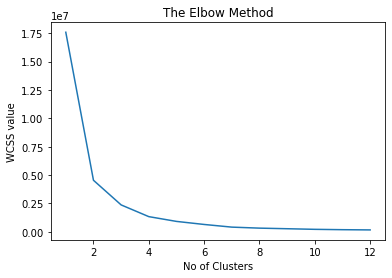

In [9]:
wcss=[]
for i in range (1,13):
    kmeans=KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)
plt.title('The Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS value')
plt.show()

Optimum number of Cluster=2

In [10]:
kmeans=KMeans(n_clusters=2,init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(data)

In [11]:
y_kmeans

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

### Silhouette Score

In [12]:
#checking silhouette score
from sklearn.metrics import silhouette_score

In [13]:
sil_kmeans=silhouette_score(data,y_kmeans)
print('Sillhouette Score',sil_kmeans)

Sillhouette Score 0.6568536504294317


## Agglomerative Hierarchical Clustering
### Dendrogram

In [14]:
#importing libraries for Agglomerative Hierarchial Clustering
import scipy.cluster.hierarchy as sch

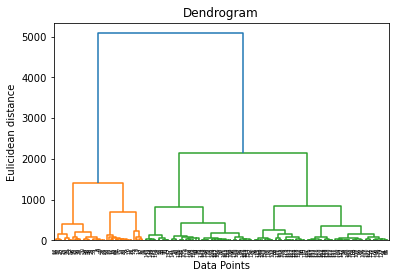

In [15]:
dendrogram=sch.dendrogram(sch.linkage(data, method="ward"))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Eulicidean distance')
plt.show()

Optimum number of clusters=2

In [16]:
from sklearn.cluster import AgglomerativeClustering

In [17]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(data)

In [18]:
y_hc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

### Silhouette Score

In [19]:
sil_hc=silhouette_score(data,y_hc)
print('Sillhouette Score',sil_hc)

Sillhouette Score 0.6587292996216912


### Normalization

In [20]:
#import library
from sklearn import preprocessing

In [21]:
nor_data=preprocessing.normalize(data)


In [22]:
type(nor_data)

numpy.ndarray

In [23]:
nor_data=pd.DataFrame(nor_data,columns=data.columns)

In [24]:
nor_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.019950,0.003711,0.003644,0.031124,0.151541,0.003444,0.002973,0.000581,0.002396,0.007342,0.001477,0.003993,0.986018
std,0.007321,0.002499,0.001409,0.014671,0.054081,0.001543,0.001802,0.000327,0.001249,0.003843,0.000736,0.001979,0.010073
min,0.008428,0.000944,0.001473,0.007739,0.064147,0.001255,0.000637,0.000145,0.000554,0.002241,0.000579,0.001675,0.951812
25%,0.013548,0.001684,0.002359,0.017615,0.109775,0.002385,0.001746,0.000277,0.001515,0.004612,0.000970,0.002535,0.981687
50%,0.018984,0.003174,0.003468,0.030036,0.146777,0.002946,0.002721,0.000514,0.002030,0.005981,0.001232,0.003384,0.988441
75%,0.024783,0.004981,0.004506,0.040010,0.183082,0.003886,0.003551,0.000833,0.003040,0.008853,0.001834,0.004870,0.993564
max,0.041106,0.014852,0.007305,0.069703,0.297958,0.008404,0.010560,0.002008,0.007469,0.021876,0.004727,0.010858,0.997835


### Principal component analysis (PCA)

In [25]:
#import library
from sklearn.decomposition import PCA

In [26]:
pca=PCA(n_components=0.97)
pca.fit(nor_data)

PCA(n_components=0.97)

In [27]:
x_pca=pca.transform(nor_data)
x_pca.shape

(178, 1)

In [28]:
pca1=PCA(n_components=10)
pca1.fit(nor_data)
x_pca1=pca1.transform(nor_data)
x_pca1.shape

(178, 10)

Silhouettescore after PCA

In [29]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x_pca)

In [30]:
#silhouette score after PCA
sil_kmeans=silhouette_score(x_pca,y_kmeans)

In [31]:
sil_kmeans

0.5657149942211519

In [32]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x_pca1)

In [33]:
sil_hc=silhouette_score(x_pca1,y_hc)

In [34]:
sil_hc

0.5366380023906002

### DBSCAN Algorithm Clustering

In [35]:
# importing the library
from sklearn.cluster import DBSCAN

In [36]:
# importing the library
from sklearn.neighbors import NearestNeighbors 
# creating an object of the NearestNeighbors class
neighbors = NearestNeighbors(n_neighbors=2) 
# fitting the data to the object
nbrs=neighbors.fit(data) 
# finding the nearest neighbours
distances,indices=nbrs.kneighbors(data) # finding the nearest neighbours

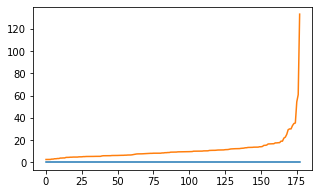

In [37]:
# sorting the distances
distances = np.sort(distances, axis = 0) 
# taking the second column of the sorted distances
distances = distances[:,:] 
# setting the figure size
plt.rcParams['figure.figsize'] = (5,3) 
# plotting the distances
plt.plot(distances) 
plt.show()

From the above plot, we note the maximum curvature of the curve is about 60, and thus we picked our Eps as 60

The min sample per cluster as 2* dimension=2* 13=26

In [38]:
dbscan=DBSCAN(eps=60,min_samples=26)

In [39]:
# fitting the model
y_db=dbscan.fit_predict(data)

In [40]:
np.unique(y_db)

array([-1,  0], dtype=int64)

In [41]:
#silhouette score
sil_db=silhouette_score(data,y_db)

In [42]:
sil_db

0.5751172188022147

#### before PCA kmeans clustering silhouette score=0.6568536504294317 and after PCA=0.5657149942211519

#### before PCA Agglomerative Clustering silhouette score=0.6587292996216912 and after PCA=0.5366380023906002

#### DBSCAN Algorithm Clustering silhouette score=0.5751172188022147